# 국내에서 석유를 가장 많이 쓰는 곳은 어디일까

- 출처 : [한국석유공사 페트로넷](https://www.petronet.co.kr)
- 참고 : [GS caltex - I am your Engergy](https://gscaltexmediahub.com/energy/study-domestic-oil-supply-demand-201911/)
- 기간 : 2012년 5월 ~ 2022년 5월
- 산업 : 농림수산업, 광업, 식품.담배업, 섬유제품업, 목재업, 제지.인쇄업, 화학제품업, 요업, 철강업, 비철금속산업, 기계조립업, 수송장비업, 기타제조업, 건설업, 기타에너지, 철도, 도로, 해운, 항공, 가정, 상업, 발전, 석유정제, 개스제조, 공공, 기타

In [3]:
import re
import math
import platform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams


# pandas max setting in display
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# minus value setting in a chart
rcParams['axes.unicode_minus']=False

# font setting in a chart
if platform.system() == 'Windows':
	plt.rc('font', family='Malgun Gothic')
else:
	plt.rc('font', family='AppleGothic')

우리나라는 석유 수입국 4위를 차지할 정도로 수입 의존도가 높습니다. 국내에서 석유를 가장 많이 쓰는 곳은 어디인지 알아보기 위해 한국석유공사 페트로넷의 국내 석유 산업별 소비 통계 자료를 바탕으로 조사해보았습니다.  

데이터는 5년 단위로 2022년 5월까지 조회가 가능하여 엑셀과 pandas의 DataFrame을 통해 2012년부터 2021년 5월까지로 구성했고, 같은 기간의 국제유가 변화 데이터만 변수로 참고하여 분석하였습니다.

In [4]:
domestic_petrol = pd.read_excel('../data/petrol/산업별소비(2012~2021).xlsx')
domestic_petrol_2022 = pd.read_excel('../data/petrol/산업별소비(202201~202205).xlsx')

print('2012 ~ 2021년 국내 산업별 석유 소비량(단위: 천 배럴/백분율(%))')
print(domestic_petrol.head())

2012 ~ 2021년 국내 산업별 석유 소비량(단위: 천 배럴/백분율(%))
       년   농림수산업      광업  식품.담배업   섬유제품업     목재업  제지.인쇄업    화학제품업      요업  \
0  2012년   15013     633    1163     833     146     635   419626    4132   
1    NaN  [1.81]  [0.08]  [0.14]  [0.10]  [0.02]  [0.08]  [50.70]  [0.50]   
2  2013년   15403     711     766     588     112     395   426843    3380   
3    NaN  [1.87]  [0.09]  [0.09]  [0.07]  [0.01]  [0.05]  [51.73]  [0.41]   
4  2014년   11810     510     631     554      65     250   442200    3006   

      철강업  비철금속산업   기계조립업   수송장비업   기타제조업     건설업   기타에너지      철도       도로  \
0    1136     425    1481    2720    9019   15545    5395    1231   217607   
1  [0.14]  [0.05]  [0.18]  [0.33]  [1.09]  [1.88]  [0.65]  [0.15]  [26.29]   
2     916     326    1282    2183    7785   15914    5266    1087   223625   
3  [0.11]  [0.04]  [0.16]  [0.26]  [0.94]  [1.93]  [0.64]  [0.13]  [27.10]   
4     880     247    1379    2123    8300   14890    5004     910   224339   

       해운      항공      가

데이터에 석유 소비량이 백분율(%)로 이미 계산되어 있기 때문에 그 부분만 가져오기 위해 [1.50]처럼 되어있는 것을 1.50와 같은 숫자 형식으로 바꾸고 2022년 1~5월까지의 데이터를 2012~2021년 데이터에 합칩니다.

In [5]:
domestic_petrol = domestic_petrol.iloc[1::2, 1:]

for col in domestic_petrol:
	domestic_petrol[col] = domestic_petrol[col].apply(lambda x: re.sub(r'(\[)|(\])' , '', x))

domestic_petrol.reset_index(drop='Index', inplace=True)
domestic_petrol = domestic_petrol.iloc[:, 1:].astype(float)

print('2012 ~ 2021년 국내 산업별 석유 소비량(백분율) 데이터')
print(domestic_petrol.head())

2012 ~ 2021년 국내 산업별 석유 소비량(백분율) 데이터
     광업  식품.담배업  섬유제품업   목재업  제지.인쇄업  화학제품업    요업   철강업  비철금속산업  기계조립업  수송장비업  \
0  0.08    0.14   0.10  0.02    0.08  50.70  0.50  0.14    0.05   0.18   0.33   
1  0.09    0.09   0.07  0.01    0.05  51.73  0.41  0.11    0.04   0.16   0.26   
2  0.06    0.08   0.07  0.01    0.03  53.83  0.37  0.11    0.03   0.17   0.26   
3  0.05    0.07   0.07  0.00    0.03  52.70  0.41  0.11    0.03   0.08   0.20   
4  0.05    0.07   0.06  0.00    0.03  53.11  0.41  0.08    0.03   0.08   0.20   

   기타제조업   건설업  기타에너지    철도     도로    해운    항공    가정    상업    발전  석유정제  개스제조  \
0   1.09  1.88   0.65  0.15  26.29  2.45  3.25  3.26  2.16  2.71  0.01  0.90   
1   0.94  1.93   0.64  0.13  27.10  1.90  3.27  3.13  1.99  2.78  0.01  0.23   
2   1.01  1.81   0.61  0.11  27.31  1.82  3.48  3.01  1.81  1.34  0.00  0.11   
3   0.97  1.92   0.65  0.10  27.62  2.22  3.59  2.97  2.15  1.50  0.00  0.12   
4   1.00  1.93   0.58  0.08  26.80  2.34  3.63  3.17  1.94  2.09  0.00  0.13 

In [6]:
domestic_petrol_2022 = domestic_petrol_2022.iloc[1::2, 1:]

for col in domestic_petrol_2022:
	domestic_petrol_2022[col] = domestic_petrol_2022[col].apply(lambda x: re.sub(r'(\[)|(\])' , '', x))

domestic_petrol_2022 = domestic_petrol_2022.astype(float)
domestic_petrol_2022 = domestic_petrol_2022.agg(sum)

In [7]:
gloabal_petrol = pd.read_csv('../data/petro/국제유가평균(201207~202206).csv')
price_avg = list(gloabal_petrol['유가'])
price_avg = [round(price, 1) for price in price_avg]

In [8]:
domestic_petrol.loc['10'] = domestic_petrol_2022
domestic_petrol.insert(0, '국제유가(단위: 원)', price_avg)
domestic_petrol.insert(0, '년도', pd.date_range('2012', '2022', freq='AS').year)

print('2012~2022년 국내 석유소비산업 소비량(백분율) 데이터')
print(domestic_petrol.head())

2012~2022년 국내 석유소비산업 소비량(백분율) 데이터
     년도  국제유가(단위: 원)    광업  식품.담배업  섬유제품업   목재업  제지.인쇄업  화학제품업    요업   철강업  \
0  2012        715.8  0.08    0.14   0.10  0.02    0.08  50.70  0.50  0.14   
1  2013        716.1  0.09    0.09   0.07  0.01    0.05  51.73  0.41  0.11   
2  2014        635.9  0.06    0.08   0.07  0.01    0.03  53.83  0.37  0.11   
3  2015        361.8  0.05    0.07   0.07  0.00    0.03  52.70  0.41  0.11   
4  2016        315.4  0.05    0.07   0.06  0.00    0.03  53.11  0.41  0.08   

   비철금속산업  기계조립업  수송장비업  기타제조업   건설업  기타에너지    철도     도로    해운    항공    가정  \
0    0.05   0.18   0.33   1.09  1.88   0.65  0.15  26.29  2.45  3.25  3.26   
1    0.04   0.16   0.26   0.94  1.93   0.64  0.13  27.10  1.90  3.27  3.13   
2    0.03   0.17   0.26   1.01  1.81   0.61  0.11  27.31  1.82  3.48  3.01   
3    0.03   0.08   0.20   0.97  1.92   0.65  0.10  27.62  2.22  3.59  2.97   
4    0.03   0.08   0.20   1.00  1.93   0.58  0.08  26.80  2.34  3.63  3.17   

     상업    발전  석유정제  개스제조   

---
### 국내 석유소비량 Top2 화학제품업, 도로 산업

In [17]:
# data normalization
# print('국내 산업별 석유 소비량 데이터 정규화')
# print(domestic_petrol.apply(lambda x: (x - x.mean() / x.std()), axis=0))

      국제유가(단위: 원)       광업    식품.담배업     섬유제품업       목재업    제지.인쇄업  \
년도                                                                   
2012   712.869074 -0.86364 -1.001479 -2.119063 -0.641107 -1.312264   
2013   713.169074 -0.85364 -1.051479 -2.149063 -0.651107 -1.342264   
2014   632.969074 -0.88364 -1.061479 -2.149063 -0.651107 -1.362264   
2015   358.869074 -0.89364 -1.071479 -2.149063 -0.661107 -1.362264   
2016   312.469074 -0.89364 -1.071479 -2.159063 -0.661107 -1.362264   
2017   373.369074 -0.90364 -1.071479 -2.149063 -0.661107 -1.362264   
2018   472.969074 -0.90364 -1.061479 -2.169063 -0.661107 -1.362264   
2019   448.369074 -0.90364 -1.081479 -2.189063 -0.661107 -1.372264   
2020   304.469074 -0.88364 -1.081479 -2.199063 -0.651107 -1.362264   
2021   498.569074 -0.87364 -1.101479 -2.199063 -0.661107 -1.372264   
2022   796.869074 -0.59364 -0.781479 -2.129063 -0.661107 -1.272264   

           화학제품업        요업       철강업    비철금속산업     기계조립업     수송장비업     기타제조업  \
년도       

In [10]:
domestic_petrol = domestic_petrol.set_index('년도')
domestic_petrol

,국제유가(단위: 원),광업,식품.담배업,섬유제품업,목재업,제지.인쇄업,화학제품업,요업,철강업,비철금속산업,기계조립업,수송장비업,기타제조업,건설업,기타에너지,철도,도로,해운,항공,가정,상업,발전,석유정제,개스제조,공공
년도,,,,,,,,,,,,,,,,,,,,,,,,,
2012,715.8,0.08,0.14,0.10,0.02,0.08,50.70,0.50,0.14,0.05,0.18,0.33,1.09,1.88,0.65,0.15,26.29,2.45,3.25,3.26,2.16,2.71,0.01,0.90,1.09
2013,716.1,0.09,0.09,0.07,0.01,0.05,51.73,0.41,0.11,0.04,0.16,0.26,0.94,1.93,0.64,0.13,27.10,1.90,3.27,3.13,1.99,2.78,0.01,0.23,1.07
2014,635.9,0.06,0.08,0.07,0.01,0.03,53.83,0.37,0.11,0.03,0.17,0.26,1.01,1.81,0.61,0.11,27.31,1.82,3.48,3.01,1.81,1.34,0.00,0.11,1.14
2015,361.8,0.05,0.07,0.07,0.00,0.03,52.70,0.41,0.11,0.03,0.08,0.20,0.97,1.92,0.65,0.10,27.62,2.22,3.59,2.97,2.15,1.50,0.00,0.12,1.21
2016,315.4,0.05,0.07,0.06,0.00,0.03,53.11,0.41,0.08,0.03,0.08,0.20,1.00,1.93,0.58,0.08,26.80,2.34,3.63,3.17,1.94,2.09,0.00,0.13,1.11
2017,376.3,0.04,0.07,0.07,0.00,0.03,54.59,0.36,0.09,0.03,0.07,0.19,1.10,1.82,0.85,0.07,26.39,2.42,3.69,3.11,1.90,0.86,0.01,0.13,1.12
2018,475.9,0.04,0.08,0.05,0.00,0.03,55.01,0.38,0.07,0.03,0.07,0.16,1.10,1.71,0.68,0.07,26.50,2.19,3.87,2.91,1.86,0.92,0.00,0.22,1.09
2019,451.3,0.04,0.06,0.03,0.00,0.02,55.21,0.43,0.08,0.03,0.07,0.17,1.14,1.70,0.72,0.07,27.33,1.84,3.82,2.75,1.72,0.61,0.00,0.13,0.98
2020,307.4,0.06,0.06,0.02,0.01,0.03,56.09,0.41,0.08,0.04,0.07,0.18,1.21,1.74,0.75,0.07,27.69,2.29,2.10,2.65,1.71,0.44,0.00,0.13,0.92


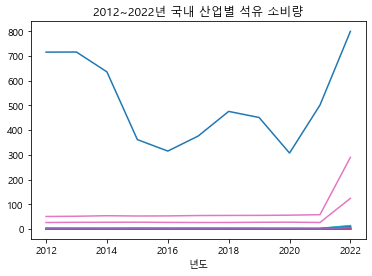

In [11]:
from matplotlib.pyplot import legend


domestic_petrol.plot.line(legend=False)
plt.title('2012~2022년 국내 산업별 석유 소비량')
plt.show()


- 2021년 이후로 석유 소비량이 뚜렷이 증가하는 화학제품업과 도로산업

	화학제품업과 도로산업을 제외한 산업들은 10년 동안 소비량이 꾸준히 비슷했고 두 산업은 2021년을 기점으로 석유 가격과 함께 소비량이 증가하고 있습니다. 변곡점이 있는 지점 전후로 해당 산업의 동향을 파악해보면 소비량이 증가한 이유를 알 수 있을 것 같습니다.

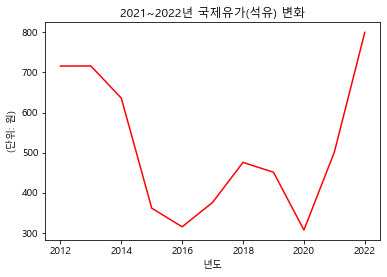

In [12]:
plt.title('2021~2022년 국제유가(석유) 변화')
plt.ylabel('(단위: 원)')
domestic_petrol['국제유가(단위: 원)'].plot.line(color='r')
plt.show()

- 하락과 등락을 반복하는 그래프  

	2021년과 2022년 구간 중 최저대였던 2016년과 2020년 전후로 석유 가격에 영향을 주는 어떤 사건이 있었음을 알 수 있습니다. 축적된 사건의 결과가 2016년과 2020년에 도드라지게 드러났을 수도 있고 또는 어떤 단편적인 하나의 사건으로 가격에 큰 변동이 있었을 수도 있습니다. 해당 시기를 전후로 다양한 데이터를 조합하면 유가에 영향을 준 요인을 파악할 수 있을 것 같습니다.

---
### 석유 가격과 상관관계가 가장 적은 곳 목재, 섬유산업, 가장 많은 곳 기타에너지, 기타제조업, 석유정제

In [13]:
relation_table = domestic_petrol.corr()
print('2012~2022년 국제유가와 국내 산업별 석유소비량과의 상관관계')
print(relation_table.head())

2012~2022년 국제유가와 국내 산업별 석유소비량과의 상관관계
             국제유가(단위: 원)        광업    식품.담배업     섬유제품업       목재업    제지.인쇄업  \
국제유가(단위: 원)     1.000000  0.642794  0.669922  0.599584  0.430640  0.753298   
광업              0.642794  1.000000  0.966111  0.425242 -0.085595  0.886083   
식품.담배업          0.669922  0.966111  1.000000  0.585968  0.001482  0.947808   
섬유제품업           0.599584  0.425242  0.585968  1.000000  0.352541  0.700831   
목재업             0.430640 -0.085595  0.001482  0.352541  1.000000  0.267122   

                화학제품업        요업       철강업    비철금속산업     기계조립업     수송장비업  \
국제유가(단위: 원)  0.528060  0.568925  0.748367  0.640716  0.829977  0.668725   
광업           0.980276  0.982495  0.872198  0.980400  0.923436  0.985218   
식품.담배업       0.952852  0.978922  0.925790  0.981342  0.943197  0.990918   
섬유제품업        0.361047  0.435133  0.753800  0.473689  0.648505  0.544108   
목재업         -0.234390 -0.137496  0.233282  0.033255  0.201676 -0.022242   

                기타제조업       건설업     기타에너지  

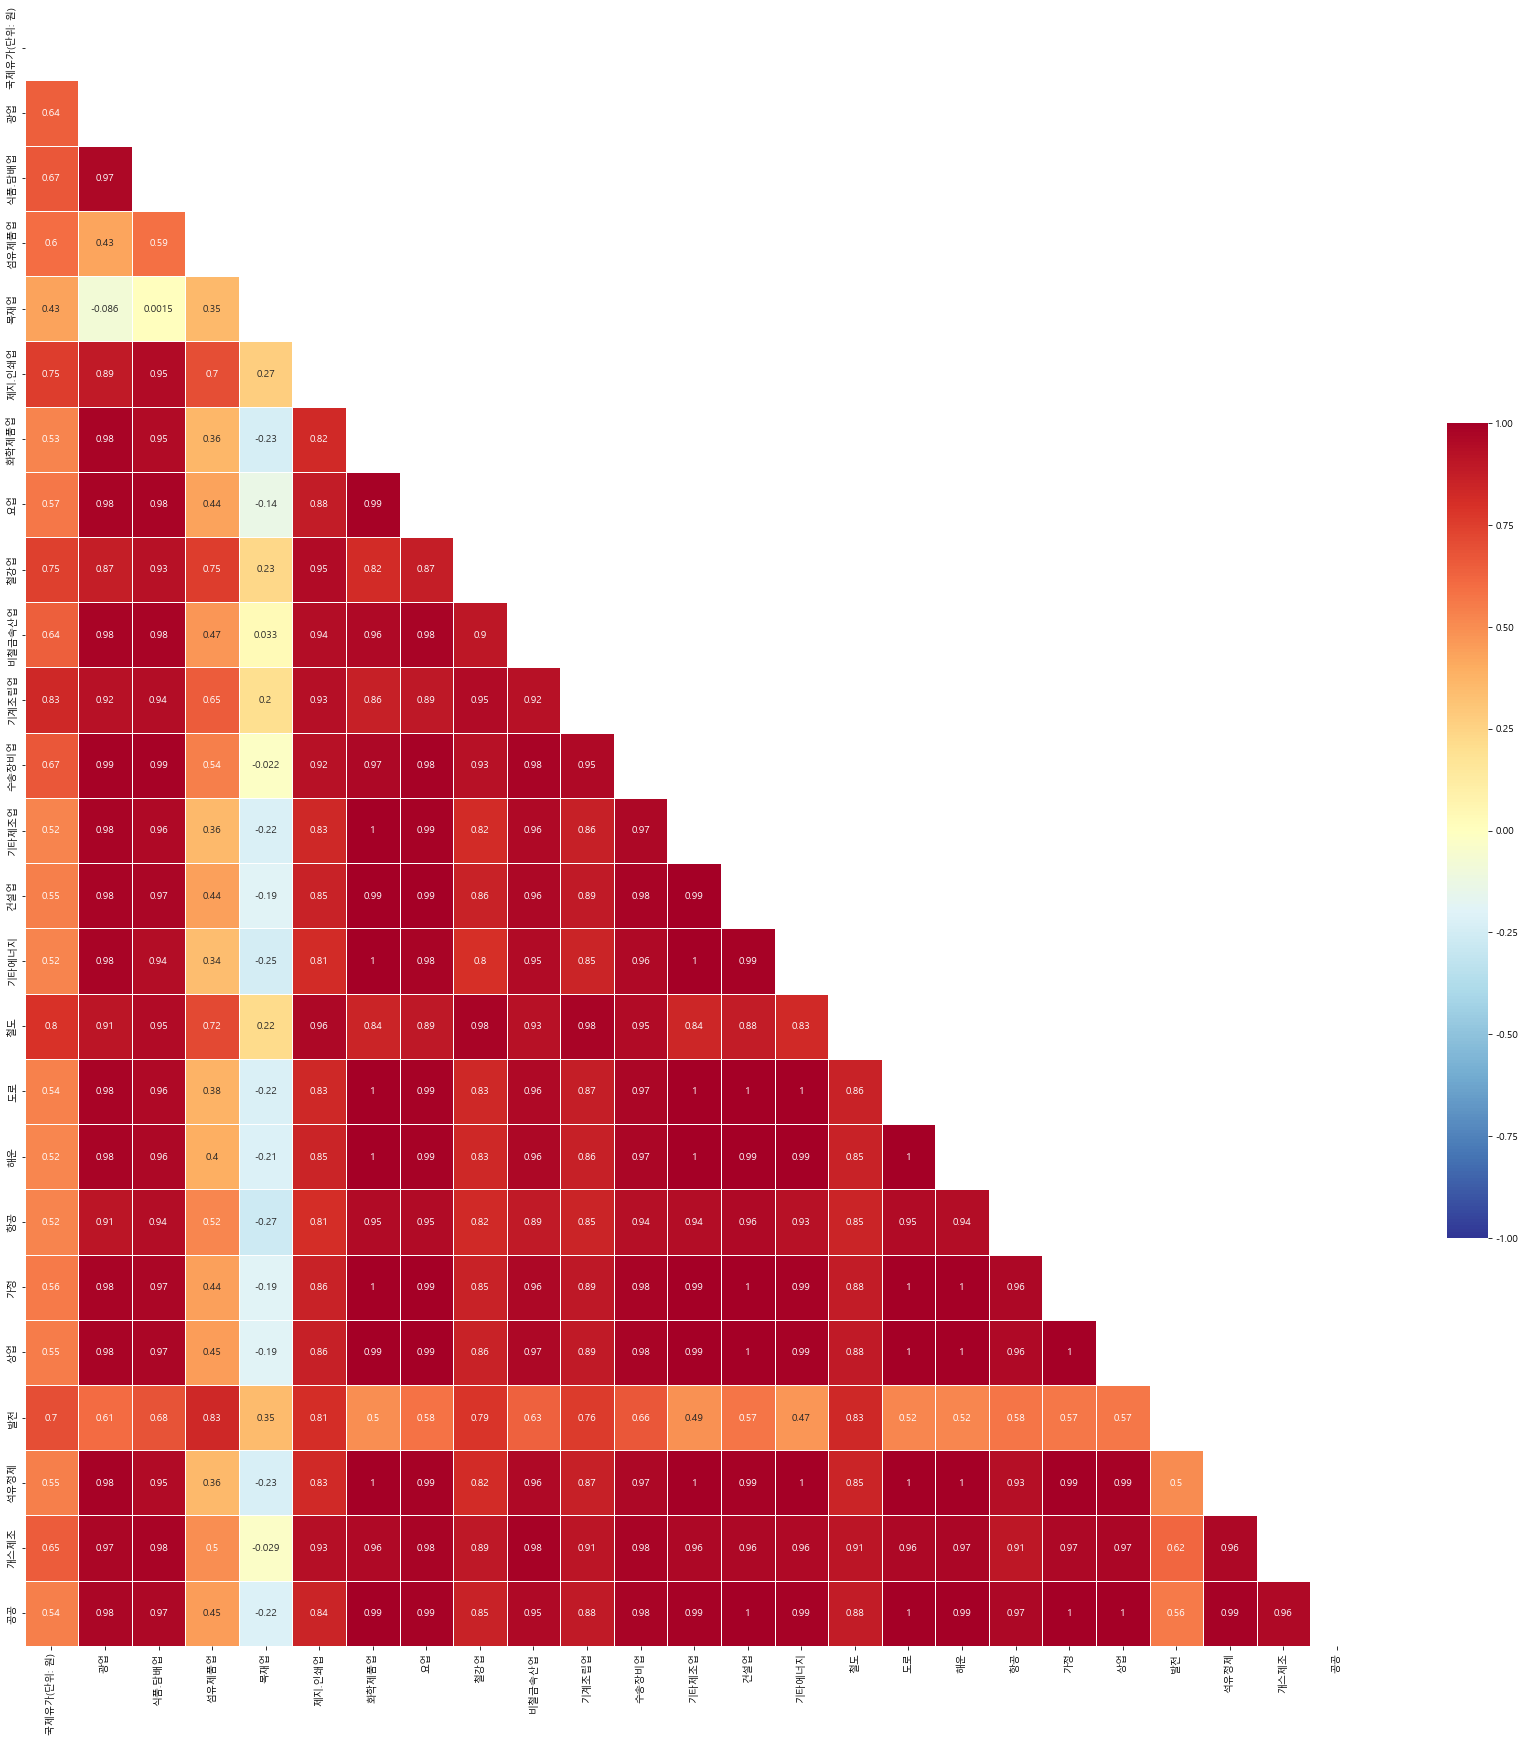

In [14]:
fig, ax = plt.subplots(figsize=(30, 30))
mask = np.zeros_like(relation_table, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(relation_table,
			cmap='RdYlBu_r', annot=True, mask=mask, linewidths=(.5),
			cbar_kws={'shrink': .5}, vmin=-1, vmax=1)
plt.show()

- 상관성 != 연관성  

	상관관계 차트에서 왼쪽 첫째줄이 국제유가와 국내 석유 산업별 소비량 데이터와의 상관관계입니다. 상관관계는 1에 가까울 수록 높습니다.  

	국제유가와 상관관계가 가장 적게 나온 국내 산업은 목재, 섬유산업이고 가장 높게 나온 분야는 기타에너지, 기타제조업, 석유정제 분야입니다. 하지만 가장 높게 나온 분야들도 0.6을 넘지는 않습니다. 대부분의 산업 분야가 0.4 ~ 0.5에 준하는 수치를 나타내고 있습니다.  

	상관관계가 적게 나온 곳이 석유의 가격에 영향을 많이 받지 않는 산업이 아닐까 추측해볼 수 있습니다.